170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-1-a061422160df>:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.2349 - loss: 2.0991 - val_accuracy: 0.3159 - val_loss: 1.8957
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.3048 - loss: 1.9052 - val_accuracy: 0.3266 - val_loss: 1.8624
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.3158 - loss: 1.8782 - val_accuracy: 0.3315 - val_loss: 1.8450
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.3241 - loss: 1.8558 - val_accuracy: 0.3384 - val_loss: 1.8325
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.3294 - loss: 1.8394 - val_accuracy: 0.3409 - val_loss: 1.8233
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 66ms/step - accuracy: 0.3367 - loss: 1.8326 - val_accuracy: 0.3454 - val_loss: 1.8158
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.3381 - loss: 1.8282 - val_accuracy: 0.3468 - val_loss: 1.8132
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8

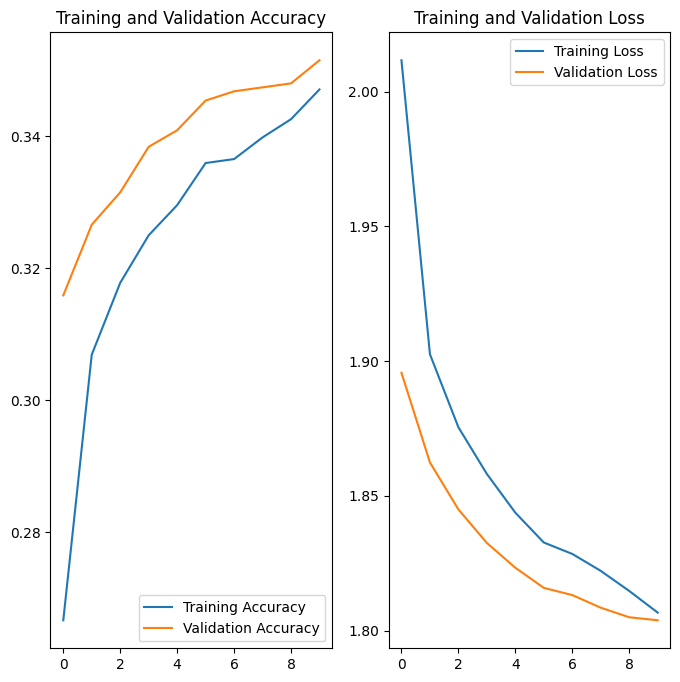

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Load the pre-trained MobileNetV2 model without the top (classification) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pool the feature maps
    layers.Dense(128, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,  # Use 10 epochs for quick training
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
